# Trend of Borrowing 
## by Karthick Mahalingam

## Investigation Overview

> - What is the loan distribution across different US States? i.e. From which US State, people borrow the most?
> - Whose is borrowing money? i.e. What is the main occupation of the borrower?
> - For what purpose, people are borrowing money for?
> - How is the lending trend before and after the 'Great Recession'

## Dataset Overview

> Dataset contains the list of loan details from popular online loan vendor (Prosper Loans). Key data fields taken for analysis are:
> - Borrower's State.
> - Loan Amount.
> - Borrower's Occupation.
> - Loan Listing Category.
> - Loan Creation Date.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_filtered = pd.read_csv('./clean_data/prosper_clean_data.csv');
df_filtered['ListingCreationDate'] = pd.to_datetime(df_filtered['ListingCreationDate'])
df_filtered.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperScore,BorrowerState,Occupation,CreditScore,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,State,Region,ListingCategoryDescription,NewLoanStatus,CreditRating
0,1021339766868145413AB3B,2007-08-26 19:09:29.263,36,Completed,0.16516,NaN,CO,Other,640.0,0.17,3083.333333,9425,Colorado,West,Not Available,Completed,C
1,08F333837879584261BEA72,2007-03-24 07:49:58.530,36,Chargedoff,0.20735,NaN,CO,Landscaping,620.0,0.49,2166.666667,5500,Colorado,West,Not Available,Chargedoff,D
2,43EC33740420974250F8640,2006-11-14 09:50:45.667,36,Completed,0.20969,NaN,CO,Teacher,620.0,0.20,2916.666667,1900,Colorado,West,Not Available,Completed,D
3,29613407575727888AD9BBD,2007-12-04 18:56:05.827,36,Completed,0.19991,NaN,CO,Nurse (RN),660.0,0.48,3852.750000,3000,Colorado,West,Not Available,Completed,C
4,477433753540072317F4546,2006-11-27 15:47:22.200,36,Completed,0.16164,NaN,CO,Computer Programmer,540.0,0.18,5666.666667,1500,Colorado,West,Not Available,Completed,E


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan Applications across US Region

In the below chart, find the distribution of loan application in different US Region. More than 60 percent of the loan activities are originating from South and West part of the US regions.

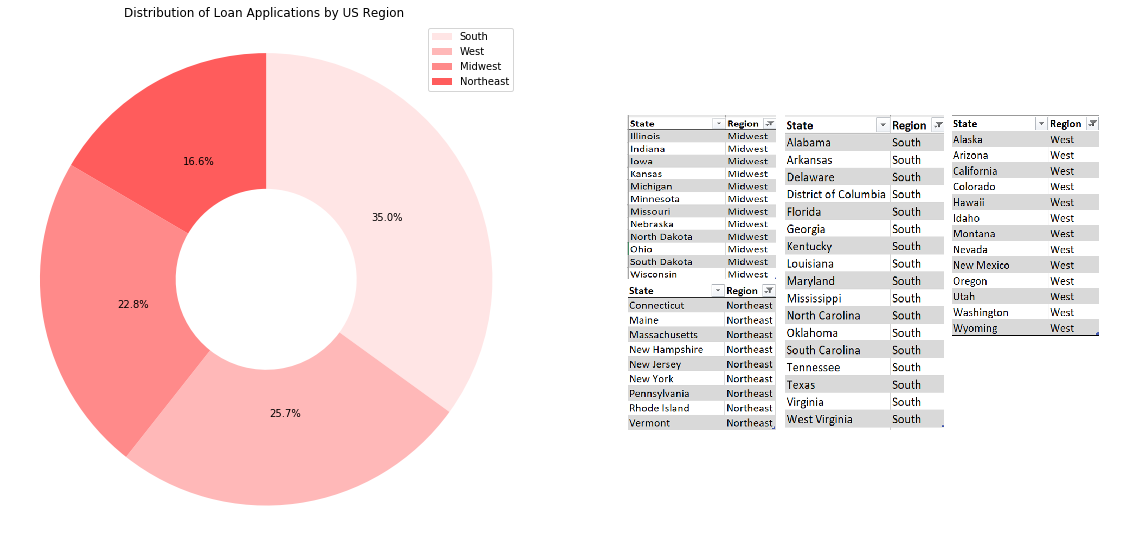

In [6]:
#Pie Chart for the distribution of loan counts by different US regions
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sorted_counts = df_filtered['Region'].value_counts();

patches= plt.pie(sorted_counts,  startangle = 90, autopct='%1.1f%%', counterclock = False, \
                 wedgeprops = {'width' : 0.6}, colors=sb.light_palette("red"));
plt.axis('square');
plt.title('Distribution of Loan Applications by US Region') 
plt.legend(patches[0], sorted_counts.index, loc="upper right");

plt.subplot(1, 2, 2)
img=mpimg.imread('States.PNG');
plt.imshow(img);
plt.axis('off');

## Distribution of loan applications by US States (Top 10 States)

- Diving deeper, it seems **13 percent** of overall loan application has originated from the State of California.  Next State, **Texas has about 6 percent** of the loan application.

**NOTE:** California is in **'West'** US Region. Texas is in **'South'** US Region.

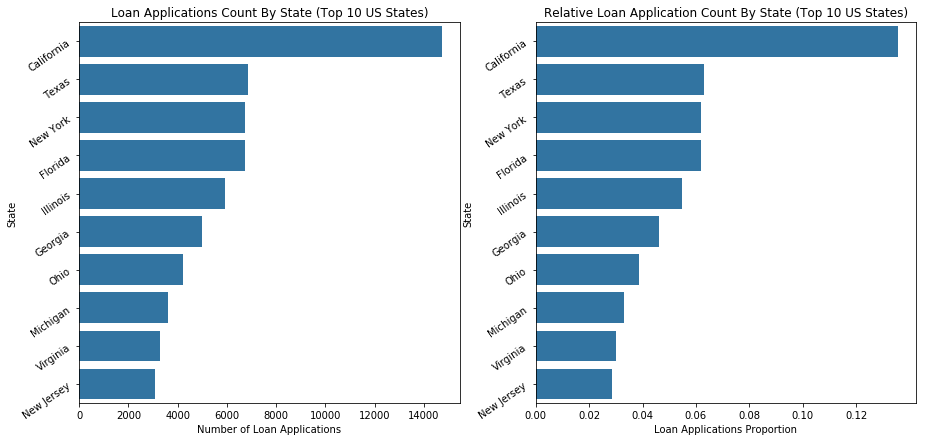

In [11]:
# Loan Distribution By State
base_color = sb.color_palette()[0]

plt.figure(figsize=(15,7))

#Sub Plot #1 - Absolute Loan Count by State.
plt.subplot(1, 2, 1)
state_order = df_filtered['State'].value_counts().index
sb.countplot(data=df_filtered, y='State', color=base_color, order=state_order[0:10]);
plt.xlabel('Number of Loan Applications');
plt.title('Loan Applications Count By State (Top 10 US States)')
plt.yticks(rotation=35)

#Sub Plot #2 - Relative Frequency of Loan By State.
plt.subplot(1, 2, 2)
n_points = df_filtered.shape[0]
max_count = df_filtered['State'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
sb.countplot(data = df_filtered, y = 'State', color = base_color, order=state_order[0:10]);
plt.xticks(tick_props * n_points, tick_names);
plt.xlabel('Loan Applications Proportion');
plt.title('Relative Loan Application Count By State (Top 10 US States)')
plt.yticks(rotation=35);

## Occupation of the major borrowers from ProsperLoans ( California State).

Looking deeper at the loan details from one of the major borrower state (i.e. California), top five occupation of the major borrowers are:

- Professional
- Executive
- Computer Programmer
- Administrative Assistant
- Sales - Commission.

Major reasons for their loan applications are:

- Debt Consolidation
- Business
- Home Improvement
- Personal Loan
- Auto

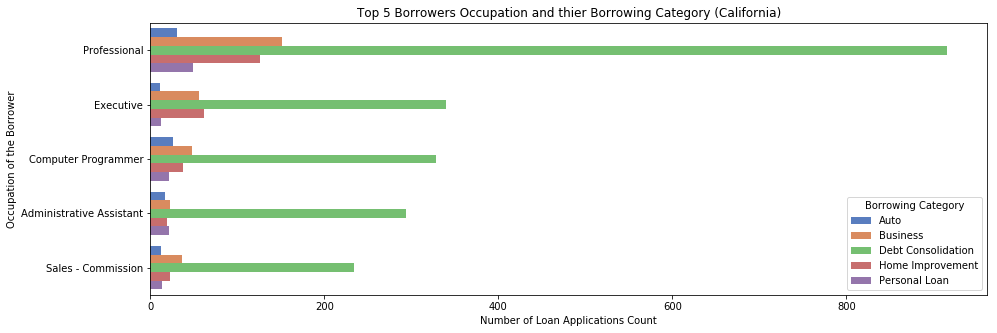

In [13]:
df_california_not_cancelled_loans = df_filtered[(df_filtered.State == 'California') \
                                                & (df_filtered.NewLoanStatus != 'Cancelled') \
                                                & (df_filtered.Occupation != 'Other') ]
#Get the top 5 applicant's occupation.
top_5_applicants_occupation = df_california_not_cancelled_loans.Occupation.value_counts()[0:5].index
df_california_top_5_app_occup_details = df_california_not_cancelled_loans[\
                                        df_california_not_cancelled_loans.Occupation.isin(top_5_applicants_occupation)]

ignore_listing_category_list = ['Not Available', 'Other']
df_california_top_5_app_occup_details_filtered = df_california_top_5_app_occup_details[~df_california_top_5_app_occup_details. \
                                      ListingCategoryDescription.isin(ignore_listing_category_list)]
#Identifying top 5 borrowing category
top_5_spending_category = df_california_top_5_app_occup_details_filtered.ListingCategoryDescription.value_counts()[0:5].index
top_5_borrowing_details = df_california_top_5_app_occup_details_filtered[ \
                df_california_top_5_app_occup_details_filtered.ListingCategoryDescription.isin(top_5_spending_category)]

df_california_top_5_app_occup_details_filtered_gp = top_5_borrowing_details[ \
                                    ['ListingKey', 'Occupation', 'ListingCategoryDescription']] \
                                    .groupby(['Occupation', 'ListingCategoryDescription']).count().reset_index()
df_california_top_5_app_occup_details_filtered_gp.rename(index=str, columns={'ListingKey': 'Count'}, inplace=True)

plt.figure(figsize=(15,5))
sb.barplot(y="Occupation", x="Count", hue="ListingCategoryDescription", data=df_california_top_5_app_occup_details_filtered_gp,
                  palette="muted", order=top_5_applicants_occupation);
plt.legend(title='Borrowing Category')

plt.xlabel('Number of Loan Applications Count')
plt.ylabel('Occupation of the Borrower')
plt.title('Top 5 Borrower''s Occupation and thier Borrowing Category (California)');

## Trend of Loan Category distribution among the top borrowers.

- ***Executives, Sales Personnels, Admin. Assistants, and Computer Programmer*** tend to follow the same trend. ie. the number of loan application counts over the period from 2006 to 2014 are similar. But ***Professionals'*** application count expontentially increased from the year 2012 to 2013.
- As stated before, ***'Debt Consolidation'*** is the primary reason among the primary borrowers. Professionals continue to be the leader in this listing category.

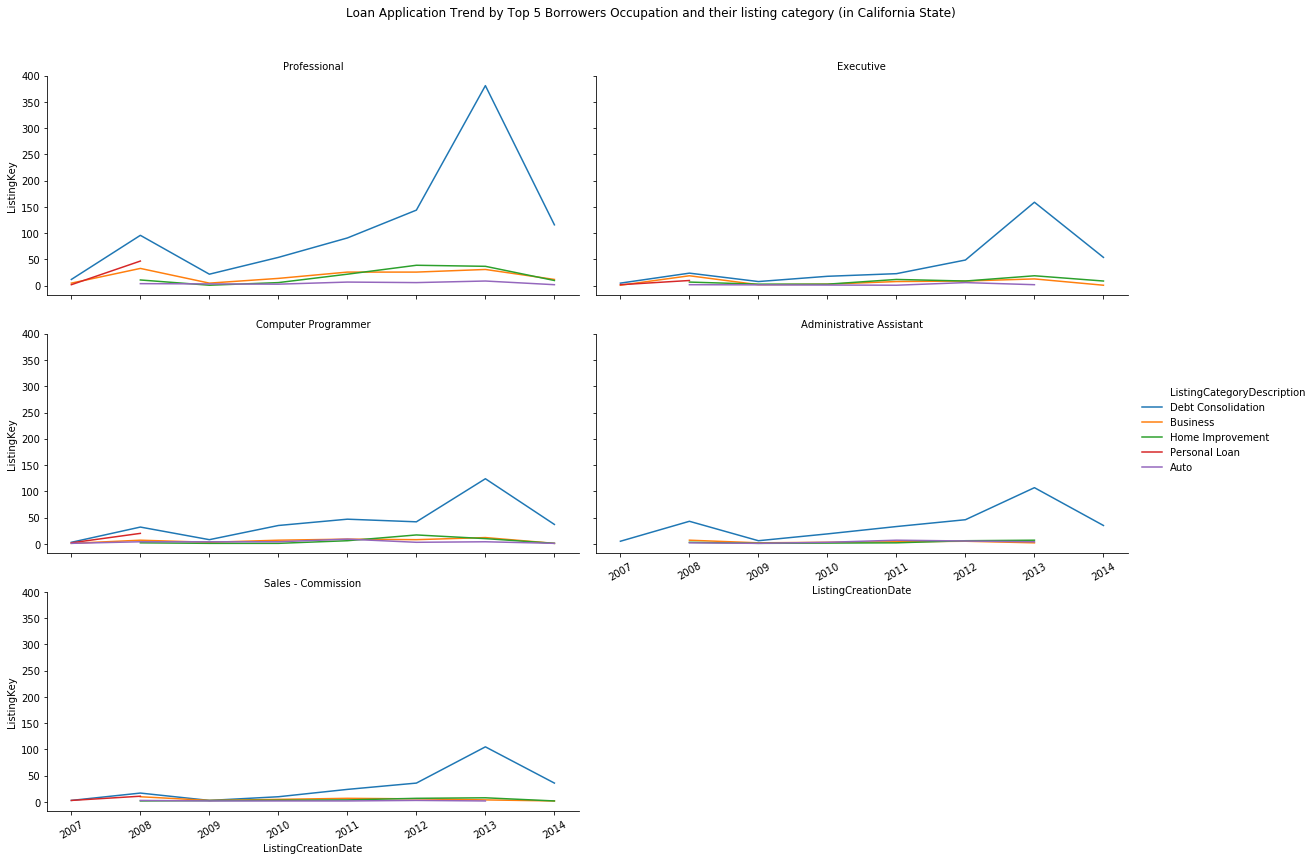

In [17]:
# Loan Origination Year vs Loan Application Count vs Occupation (Top 5) vs Loan Listing Category (Top 5),
df_california_top_5_app_occup_details_filtered = top_5_borrowing_details[['ListingKey', 'ListingCreationDate', \
                                                                                        'Occupation', 'ListingCategoryDescription']]

df_california_top_5_app_occup_details_filtered_gp = df_california_top_5_app_occup_details_filtered.groupby([ \
                                            df_california_top_5_app_occup_details_filtered.ListingCreationDate.dt.year, \
                                            'Occupation', 'ListingCategoryDescription'])

df_california_top_5_app_occup_details_filtered_gp = df_california_top_5_app_occup_details_filtered_gp.count() \
                                                    ['ListingKey'].reset_index()

col_order = ['Professional', 'Executive', 'Computer Programmer', 'Administrative Assistant', 'Sales - Commission']
g = sb.FacetGrid(data = df_california_top_5_app_occup_details_filtered_gp, col = 'Occupation', \
                 col_wrap=2, aspect=2, height=4, col_order=col_order)
g.map(sb.lineplot, 'ListingCreationDate', 'ListingKey', 'ListingCategoryDescription', hue_order=top_5_spending_category  ).add_legend()
g.set_titles('{col_name}')
g.set_xticklabels(rotation=30);
plt.subplots_adjust(top=0.9); # Adjustment for the title.
g.fig.suptitle('Loan Application Trend by Top 5 Borrowers Occupation and their listing category (in California State)');

## Trending of lending before and after recession.

From the year 2007 to 2008, borrowing increased by **0.3%**. But the during the **Great Recession period** (2008-2009), the borrowing dropped by **85 percent**. This could be the result of feared investors during the great recession period. Once the recession period ended (after the year 2009), the borrowing activity increased drammatically.

**IMPORTANT NOTE: There is a dip in the loan amount in the year 2014, this is because we have data only upto APRIL 2014**


Year  LoanAmount_In_Millions
2006               15.364212
2007               66.782198
2008               67.044997
2009                9.692013
2010               26.775582
2011               76.711783
2012              154.033169
2013              375.740433
2014              127.900565


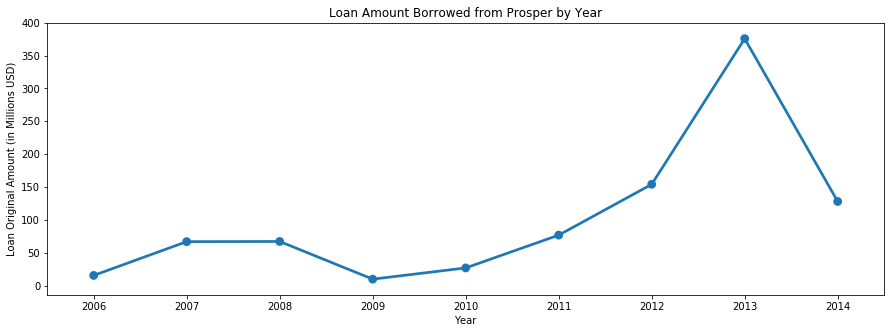

In [18]:
# Identify the relation between the year and loan original amount..

#get the loan original amount whose loan application is not cancelled.
df_loan_amt_year = df_filtered[df_filtered.NewLoanStatus != 'Cancelled'][[ 'ListingCreationDate', 'LoanOriginalAmount']]

#group loanamount by year.
df_loan_amt_year_gp = df_loan_amt_year.groupby(df_filtered.ListingCreationDate.dt.year)
df_loan_amt_year_gp = df_loan_amt_year_gp.sum()[['LoanOriginalAmount']].reset_index()

#Convert dollars to Millions.
df_loan_amt_year_gp.LoanOriginalAmount = df_loan_amt_year_gp.LoanOriginalAmount / 1000000
#Renaming columns for consistency
df_loan_amt_year_gp.rename(index=str, columns={'ListingCreationDate': 'Year', 'LoanOriginalAmount': 'LoanAmount_In_Millions'}, inplace=True);

#plotting the graph.
plt.figure(figsize=(15, 5))
sb.pointplot(data=df_loan_amt_year_gp, x= 'Year', y='LoanAmount_In_Millions', color=base_color);
plt.ylabel('Loan Original Amount (in Millions USD)')
plt.xlabel('Year');
plt.title('Loan Amount Borrowed from Prosper by Year');
print(df_loan_amt_year_gp.to_string(index=False));


# Thank You for watching!!! 

# Happy Lending & Borrowing


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!